### 0. Import dependencies

In [143]:
# read csv file
import pandas as pd
# import the pycaret TS regression 
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('btcusdt_1d_ohlcv_av_1Jan2019_to_24Sep2021_1day_csv_ver.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1190 non-null   int64  
 1   open_time          1190 non-null   object 
 2   BTCUSDT_open       1190 non-null   float64
 3   BTCUSDT_high       1190 non-null   float64
 4   BTCUSDT_low        1190 non-null   float64
 5   BTCUSDT_close      1190 non-null   float64
 6   BTCUSDT_volume     1190 non-null   float64
 7   close_time         1190 non-null   object 
 8   qav                1190 non-null   float64
 9   num_trades         1190 non-null   int64  
 10  taker_base_vol     1190 non-null   float64
 11  taker_quote_vol    1190 non-null   float64
 12  is_best_match      1190 non-null   int64  
 13  date               1190 non-null   object 
 14  usd_close          172 non-null    float64
 15  spy_close          172 non-null    float64
 16  ftse_china_close   238 n

In [70]:
del df['Unnamed: 0']

In [72]:
df['close_diff'] = df.BTCUSDT_close.diff()

In [74]:
df = df.loc[df['year'] == 2021]

In [75]:
df = df[['date', 'close_diff']]

In [76]:
#df = df.asfreq('d')

In [77]:
df.head()

,date,close_diff
870,2021-01-01,408.06
871,2021-01-02,2846.64
872,2021-01-03,821.72
873,2021-01-03,0.00
874,2021-01-04,-1011.34


In [78]:
df.index = pd.DatetimeIndex(df['date'])
#df.groupby(df.index).first()
df.drop(['date'],axis=1,inplace=True)
df.head(1)

,close_diff
date,
2021-01-01,408.06


In [79]:
df.index.is_unique

False

In [80]:
df = df.loc[~df.index.duplicated(), :]

In [81]:
df = df.asfreq('d')
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18',
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24'],
              dtype='datetime64[ns]', name='date', length=267, freq='D')

In [108]:
#check for nulls
df.isnull().values.any()

False

### Start pycaret experiment for model evaluation, just based on close prices

In [128]:
exp = TimeSeriesExperiment()
exp.setup(data=df,session_id=42, fh=56) #fh we should test for 2 months data 56 days

,Description,Value
0,session_id,42
1,Original Data,"(267, 1)"
2,Missing Values,False
3,Transformed Train Set,"(211,)"
4,Transformed Test Set,"(56,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='close_diff', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill_v...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify

In [129]:
best = exp.compare_models(sort = 'MAPE') #mean abs percentage error

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,1506.6874,4071315.0783,1.0730,1.8795,-0.0317,0.1733
arima,ARIMA,1514.5486,4078818.0565,1.9021,1.6510,-0.0340,0.5167
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,2213.8097,8088001.1087,3.9698,1.5377,-1.4084,0.1533
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1792.3059,5388717.8296,4.1132,1.5505,-0.4244,0.1067
theta,Theta Forecaster,1595.3121,4401788.1000,4.5469,1.5321,-0.1484,0.0333
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1600.2756,4353829.5905,4.8671,1.5699,-0.1644,0.1000
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1611.0566,4412393.5438,4.9458,1.5584,-0.1779,0.0800
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1663.3397,4689605.1268,5.1548,1.5474,-0.2489,0.0833
polytrend,Polynomial Trend Forecaster,1620.6914,4455590.0319,5.2120,1.5401,-0.1871,0.0233
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1666.1017,4708806.1136,5.2170,1.5487,-0.2540,0.0800


INFO:logs:master_model_container: 50
INFO:logs:display_container: 2
INFO:logs:AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=42, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)
INFO:logs:compare_models() succesfully completed......................................


In [135]:
## Create a model manually
model = exp.create_model("auto_arima")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2021-02-12,1523.0568,3911492.9634,1.0000,2.0000,-0.0097
1,2021-04-09,1859.7416,6086558.0791,1.2190,1.6385,-0.0811
2,2021-06-04,1137.2637,2215894.1924,1.0000,2.0000,-0.0042
Mean,nan,1506.6874,4071315.0783,1.0730,1.8795,-0.0317
SD,nan,295.1774,1584227.9007,0.1032,0.1704,0.0350


INFO:logs:master_model_container: 52
INFO:logs:display_container: 4
INFO:logs:AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=42, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)
INFO:logs:create_model() successfully completed......................................


AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=42, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)

In [136]:
y_train = exp.get_config("y_train")
y_train[:5]

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=y_train, self=<pycaret.internal.pycaret_experiment.time_series_experiment.TimeSeriesExperiment object at 0x7fa2a2e0bd68>)
INFO:logs:Variable: y_train returned as date
2021-01-01     408.06
2021-01-02    2846.64
2021-01-03     821.72
2021-01-04   -1011.34
2021-01-05    1960.82
               ...   
2021-07-26    1856.58
2021-07-27    2220.27
2021-07-28     561.69
2021-07-29      -3.08
2021-07-30    2189.89
Freq: D, Name: close_diff, Length: 211, dtype: float64
INFO:logs:get_config() succesfully completed......................................


date
2021-01-01     408.06
2021-01-02    2846.64
2021-01-03     821.72
2021-01-04   -1011.34
2021-01-05    1960.82
Freq: D, Name: close_diff, dtype: float64

In [140]:
copy_df = df.squeeze()

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,1261.6971,1661.9518,1.0000,2.0000,-0.0008


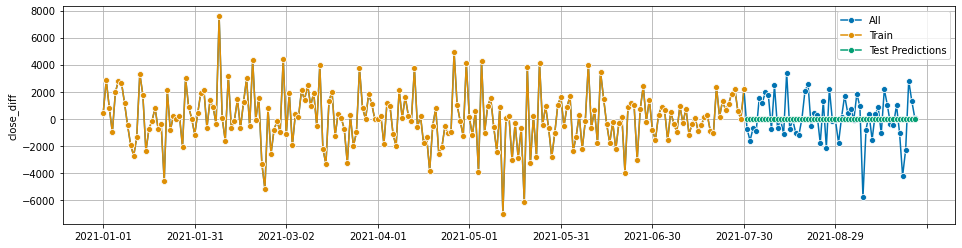

In [144]:
y_predict = exp.predict_model(model)
plot_series(copy_df, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

### Start pycaret experiment for model evaluation, just based on BTC actual prices

In [146]:
df = pd.read_csv('btcusdt_1d_ohlcv_av_1Jan2019_to_24Sep2021_1day_csv_ver.csv')

In [147]:
del df['Unnamed: 0']

In [148]:
df = df.loc[df['year'] == 2021]

In [149]:
df = df[['date', 'BTCUSDT_close']]

In [150]:
df.head()

,date,BTCUSDT_close
870,2021-01-01,29331.69
871,2021-01-02,32178.33
872,2021-01-03,33000.05
873,2021-01-03,33000.05
874,2021-01-04,31988.71


In [151]:
df.index = pd.DatetimeIndex(df['date'])
#df.groupby(df.index).first()
df.drop(['date'],axis=1,inplace=True)
df.head(1)

,BTCUSDT_close
date,
2021-01-01,29331.69


In [152]:
df.index.is_unique

False

In [153]:
df = df.loc[~df.index.duplicated(), :]

In [154]:
df = df.asfreq('d')
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18',
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24'],
              dtype='datetime64[ns]', name='date', length=267, freq='D')

In [155]:
exp = TimeSeriesExperiment()
exp.setup(data=df,session_id=42, fh=56) #fh we should test for 2 months data 56 days

,Description,Value
0,session_id,42
1,Original Data,"(267, 1)"
2,Missing Values,False
3,Transformed Train Set,"(211,)"
4,Transformed Test Set,"(56,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='BTCUSDT_close',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fil...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthroug

In [156]:
best = exp.compare_models(sort = 'MAPE') #mean abs percentage error

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,6449.5876,77469857.8231,0.1476,0.1359,-1.2723,4.5800
arima,ARIMA,6673.9805,99540858.2124,0.1562,0.1359,-1.1378,0.3467
snaive,Seasonal Naive Forecaster,7317.3764,95923619.6321,0.1631,0.1555,-2.3674,5.6467
theta,Theta Forecaster,7410.5609,117280594.1488,0.1769,0.1507,-1.6308,0.0200
ets,ETS,7544.0866,156307937.7067,0.1789,0.1465,-1.7123,0.0533
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,8632.5662,187298174.4939,0.2111,0.1678,-2.5982,0.0667
exp_smooth,Exponential Smoothing,9207.0365,179081922.6293,0.2279,0.2099,-5.2439,0.0933
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,10734.6286,197160159.7008,0.2513,0.2164,-4.4665,0.0967
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,10774.2759,217422345.7544,0.2523,0.2113,-4.1352,0.2400
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,10919.9996,224723644.6311,0.2547,0.2129,-4.1565,2.2200


INFO:logs:master_model_container: 50
INFO:logs:display_container: 2
INFO:logs:NaiveForecaster(sp=1, strategy='last', window_length=None)
INFO:logs:compare_models() succesfully completed......................................


In [160]:
copy_df2 = df.squeeze()

In [162]:
## Create a model manually
model = exp.create_model("naive")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2021-02-12,6897.9186,63993838.2042,0.1224,0.1330,-2.4228
1,2021-04-09,9460.6052,156967184.3306,0.2320,0.1901,-0.8602
2,2021-06-04,2990.2389,11448550.9347,0.0884,0.0845,-0.5339
Mean,nan,6449.5876,77469857.8231,0.1476,0.1359,-1.2723
SD,nan,2660.4712,60167103.3868,0.0613,0.0432,0.8244


INFO:logs:master_model_container: 51
INFO:logs:display_container: 5
INFO:logs:NaiveForecaster(sp=1, strategy='last', window_length=None)
INFO:logs:create_model() successfully completed......................................


NaiveForecaster(sp=1, strategy='last', window_length=None)

In [163]:
y_train = exp.get_config("y_train")
y_train[:5]

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=y_train, self=<pycaret.internal.pycaret_experiment.time_series_experiment.TimeSeriesExperiment object at 0x7fa29d2d1048>)
INFO:logs:Variable: y_train returned as date
2021-01-01    29331.69
2021-01-02    32178.33
2021-01-03    33000.05
2021-01-04    31988.71
2021-01-05    33949.53
                ...   
2021-07-26    37237.60
2021-07-27    39457.87
2021-07-28    40019.56
2021-07-29    40016.48
2021-07-30    42206.37
Freq: D, Name: BTCUSDT_close, Length: 211, dtype: float64
INFO:logs:get_config() succesfully completed......................................


date
2021-01-01    29331.69
2021-01-02    32178.33
2021-01-03    33000.05
2021-01-04    31988.71
2021-01-05    33949.53
Freq: D, Name: BTCUSDT_close, dtype: float64

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,4468.1991,4990.1701,0.0945,0.0998,-1.6029


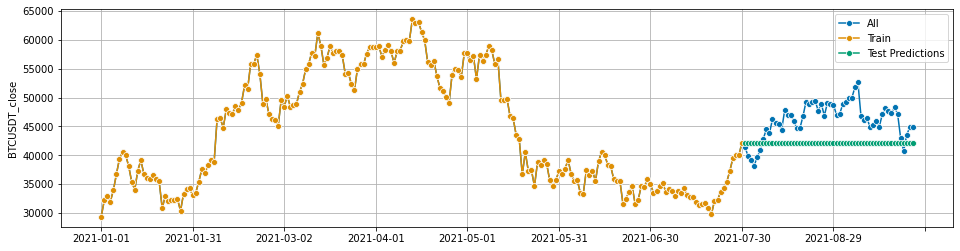

In [164]:
y_predict = exp.predict_model(model)
plot_series(copy_df2, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

### Start pycaret experiment for model evaluation, just based on BTC price close pct diff

In [166]:
df = pd.read_csv('btcusdt_1d_ohlcv_av_1Jan2019_to_24Sep2021_1day_csv_ver.csv')

In [167]:
del df['Unnamed: 0']

In [168]:
df['BTC_pct_diff'] = df.BTCUSDT_close.pct_change()

In [169]:
df = df.loc[df['year'] == 2021]

In [170]:
df = df[['date', 'BTC_pct_diff']]

In [171]:
#df = df.asfreq('d')

In [172]:
df.head()

,date,BTC_pct_diff
870,2021-01-01,0.014108
871,2021-01-02,0.097050
872,2021-01-03,0.025536
873,2021-01-03,0.000000
874,2021-01-04,-0.030647


In [173]:
df.index = pd.DatetimeIndex(df['date'])
#df.groupby(df.index).first()
df.drop(['date'],axis=1,inplace=True)
df.head(1)

,BTC_pct_diff
date,
2021-01-01,0.014108


In [174]:
df.index.is_unique

False

In [175]:
df = df.loc[~df.index.duplicated(), :]

In [176]:
df = df.asfreq('d')
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18',
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24'],
              dtype='datetime64[ns]', name='date', length=267, freq='D')

In [177]:
#check for nulls
df.isnull().values.any()

False

In [178]:
exp = TimeSeriesExperiment()
exp.setup(data=df,session_id=42, fh=56) #fh we should test for 2 months data 56 days

,Description,Value
0,session_id,42
1,Original Data,"(267, 1)"
2,Missing Values,False
3,Transformed Train Set,"(211,)"
4,Transformed Test Set,"(56,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='BTC_pct_diff',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthroug

In [179]:
best = exp.compare_models(sort = 'MAPE') #mean abs percentage error

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.0341,0.0020,2.6993,1.5714,-0.0497,0.3167
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0362,0.0022,4.0176,1.4532,-0.1736,0.3200
auto_arima,Auto ARIMA,0.0358,0.0022,4.2741,1.4945,-0.1295,1.3967
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0392,0.0026,4.5196,1.4472,-0.3374,0.1067
theta,Theta Forecaster,0.0351,0.0021,4.6024,1.5638,-0.1202,0.0500
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0352,0.0021,4.9096,1.4936,-0.1210,0.0733
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0352,0.0021,4.9196,1.4989,-0.1247,0.1167
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.0352,0.0021,4.9199,1.4989,-0.1251,0.0833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.0352,0.0021,4.9199,1.4989,-0.1251,0.0833
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.0352,0.0021,4.9199,1.4989,-0.1251,0.0867


INFO:logs:master_model_container: 50
INFO:logs:display_container: 2
INFO:logs:ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
INFO:logs:compare_models() succesfully completed......................................


In [180]:
## Create a model manually
model = exp.create_model("arima")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2021-02-12,0.0299,0.0015,5.0707,1.4068,-0.0552
1,2021-04-09,0.0398,0.0028,1.4144,1.6168,-0.0879
2,2021-06-04,0.0326,0.0018,1.6126,1.6907,-0.0062
Mean,nan,0.0341,0.0020,2.6993,1.5714,-0.0497
SD,nan,0.0042,0.0006,1.6788,0.1203,0.0336


INFO:logs:master_model_container: 51
INFO:logs:display_container: 3
INFO:logs:ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
INFO:logs:create_model() successfully completed......................................


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [181]:
y_train = exp.get_config("y_train")
y_train[:5]

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=y_train, self=<pycaret.internal.pycaret_experiment.time_series_experiment.TimeSeriesExperiment object at 0x7fa2a1d89748>)
INFO:logs:Variable: y_train returned as date
2021-01-01    0.014108
2021-01-02    0.097050
2021-01-03    0.025536
2021-01-04   -0.030647
2021-01-05    0.061297
                ...   
2021-07-26    0.052474
2021-07-27    0.059624
2021-07-28    0.014235
2021-07-29   -0.000077
2021-07-30    0.054725
Freq: D, Name: BTC_pct_diff, Length: 211, dtype: float64
INFO:logs:get_config() succesfully completed......................................


date
2021-01-01    0.014108
2021-01-02    0.097050
2021-01-03    0.025536
2021-01-04   -0.030647
2021-01-05    0.061297
Freq: D, Name: BTC_pct_diff, dtype: float64

In [182]:
copy_df2 = df.squeeze()

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.0277,0.0357,1.3162,1.7186,0.0010


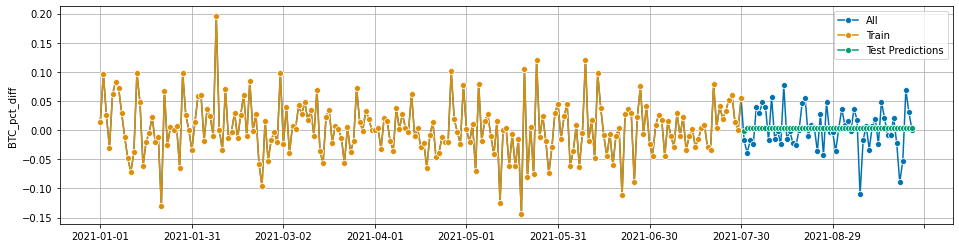

In [183]:
y_predict = exp.predict_model(model)
plot_series(copy_df2, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

### Start pycaret experiment for model evaluation, just based on BTC actual prices

In [185]:
df = pd.read_csv('btcusdt_1d_ohlcv_av_1Jan2019_to_24Sep2021_1day_csv_ver.csv')

In [186]:
del df['Unnamed: 0']

In [187]:
df = df.loc[df['year'] == 2021]

In [188]:
df = df[['date', 'BTCUSDT_close']]

In [189]:
df.head()

,date,BTCUSDT_close
870,2021-01-01,29331.69
871,2021-01-02,32178.33
872,2021-01-03,33000.05
873,2021-01-03,33000.05
874,2021-01-04,31988.71


In [190]:
df.index = pd.DatetimeIndex(df['date'])
#df.groupby(df.index).first()
df.drop(['date'],axis=1,inplace=True)
df.head(1)

,BTCUSDT_close
date,
2021-01-01,29331.69


In [191]:
df.index.is_unique

False

In [192]:
df = df.loc[~df.index.duplicated(), :]

In [193]:
df = df.asfreq('d')
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18',
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24'],
              dtype='datetime64[ns]', name='date', length=267, freq='D')

In [194]:
exp = TimeSeriesExperiment()
exp.setup(data=df,session_id=42, fh=56) #fh we should test for 2 months data 56 days

,Description,Value
0,session_id,42
1,Original Data,"(267, 1)"
2,Missing Values,False
3,Transformed Train Set,"(211,)"
4,Transformed Test Set,"(56,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='BTCUSDT_close',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fil...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthroug

In [156]:
best = exp.compare_models(sort = 'MAPE') #mean abs percentage error

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,6449.5876,77469857.8231,0.1476,0.1359,-1.2723,4.5800
arima,ARIMA,6673.9805,99540858.2124,0.1562,0.1359,-1.1378,0.3467
snaive,Seasonal Naive Forecaster,7317.3764,95923619.6321,0.1631,0.1555,-2.3674,5.6467
theta,Theta Forecaster,7410.5609,117280594.1488,0.1769,0.1507,-1.6308,0.0200
ets,ETS,7544.0866,156307937.7067,0.1789,0.1465,-1.7123,0.0533
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,8632.5662,187298174.4939,0.2111,0.1678,-2.5982,0.0667
exp_smooth,Exponential Smoothing,9207.0365,179081922.6293,0.2279,0.2099,-5.2439,0.0933
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,10734.6286,197160159.7008,0.2513,0.2164,-4.4665,0.0967
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,10774.2759,217422345.7544,0.2523,0.2113,-4.1352,0.2400
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,10919.9996,224723644.6311,0.2547,0.2129,-4.1565,2.2200


INFO:logs:master_model_container: 50
INFO:logs:display_container: 2
INFO:logs:NaiveForecaster(sp=1, strategy='last', window_length=None)
INFO:logs:compare_models() succesfully completed......................................


In [200]:
copy_df2 = df.squeeze()

In [195]:
## Create a model manually
model = exp.create_model("naive")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2021-02-12,6897.9186,63993838.2042,0.1224,0.1330,-2.4228
1,2021-04-09,9460.6052,156967184.3306,0.2320,0.1901,-0.8602
2,2021-06-04,2990.2389,11448550.9347,0.0884,0.0845,-0.5339
Mean,nan,6449.5876,77469857.8231,0.1476,0.1359,-1.2723
SD,nan,2660.4712,60167103.3868,0.0613,0.0432,0.8244


INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:NaiveForecaster(sp=1, strategy='last', window_length=None)
INFO:logs:create_model() successfully completed......................................


NaiveForecaster(sp=1, strategy='last', window_length=None)

In [196]:
y_train = exp.get_config("y_train")
y_train[:5]

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=y_train, self=<pycaret.internal.pycaret_experiment.time_series_experiment.TimeSeriesExperiment object at 0x7fa29d296da0>)
INFO:logs:Variable: y_train returned as date
2021-01-01    29331.69
2021-01-02    32178.33
2021-01-03    33000.05
2021-01-04    31988.71
2021-01-05    33949.53
                ...   
2021-07-26    37237.60
2021-07-27    39457.87
2021-07-28    40019.56
2021-07-29    40016.48
2021-07-30    42206.37
Freq: D, Name: BTCUSDT_close, Length: 211, dtype: float64
INFO:logs:get_config() succesfully completed......................................


date
2021-01-01    29331.69
2021-01-02    32178.33
2021-01-03    33000.05
2021-01-04    31988.71
2021-01-05    33949.53
Freq: D, Name: BTCUSDT_close, dtype: float64

In [203]:
y_predict = exp.predict_model(best)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,46122.3367,46225.9334,1.0000,2.0000,-222.3554


INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,4468.1991,4990.1701,0.0945,0.0998,-1.6029


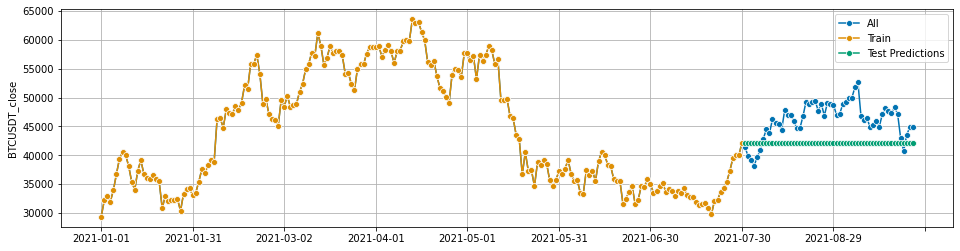

In [164]:
y_predict = exp.predict_model(model)
plot_series(copy_df2, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()